# Predicting Energy Behavior of Prosumers in Estonia - A Project on Minimizing Imbalance Costs by Enefit

#### Objective : Develop a prediction model for prosumer energy patterns in Estonia to minimize future imbalance costs. 

## 1. Data Wrangling

<blockquote> Compiling a dataset with relevant features : county name, consumption pattern, production pattern, installed capacity of solar panel, and direct solar radiation </blockquote>

In [168]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Train Data : Consumption and Production Pattern year 2021 - 2023

In [6]:
df1 = pd.read_csv('C:/Users/Michelle Natali/Downloads/Group 4 - Data/predict-energy-behavior-of-prosumers/train.csv')

In [7]:
df1[['date', 'time']] = df1['datetime'].astype(str).str.split(' ',n=1, expand=True)
df1.drop(columns='time', inplace=True)
df1

,county,is_business,product_type,target,is_consumption,datetime,data_block_id,row_id,prediction_unit_id,date
0,0,0,1,0.713,0,2021-09-01 00:00:00,0,0,0,2021-09-01
1,0,0,1,96.590,1,2021-09-01 00:00:00,0,1,0,2021-09-01
2,0,0,2,0.000,0,2021-09-01 00:00:00,0,2,1,2021-09-01
3,0,0,2,17.314,1,2021-09-01 00:00:00,0,3,1,2021-09-01
4,0,0,3,2.904,0,2021-09-01 00:00:00,0,4,2,2021-09-01
...,...,...,...,...,...,...,...,...,...,...
2018347,15,1,0,197.233,1,2023-05-31 23:00:00,637,2018347,64,2023-05-31
2018348,15,1,1,0.000,0,2023-05-31 23:00:00,637,2018348,59,2023-05-31
2018349,15,1,1,28.404,1,2023-05-31 23:00:00,637,2018349,59,2023-05-31
2018350,15,1,3,0.000,0,2023-05-31 23:00:00,637,2018350,60,2023-05-31


### Client Data : Installed Capacity of Solar Panel

In [8]:
df2 = pd.read_csv('C:/Users/Michelle Natali/Downloads/Group 4 - Data/predict-energy-behavior-of-prosumers/client.csv')
df2

,product_type,county,eic_count,installed_capacity,is_business,date,data_block_id
0,1,0,108,952.89,0,2021-09-01,2
1,2,0,17,166.40,0,2021-09-01,2
2,3,0,688,7207.88,0,2021-09-01,2
3,0,0,5,400.00,1,2021-09-01,2
4,1,0,43,1411.00,1,2021-09-01,2
...,...,...,...,...,...,...,...
41914,1,15,51,415.60,0,2023-05-29,637
41915,3,15,161,2035.75,0,2023-05-29,637
41916,0,15,15,620.00,1,2023-05-29,637
41917,1,15,20,624.50,1,2023-05-29,637


In [9]:
#Show type of Data
df1.info()
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2018352 entries, 0 to 2018351
Data columns (total 10 columns):
 #   Column              Dtype  
---  ------              -----  
 0   county              int64  
 1   is_business         int64  
 2   product_type        int64  
 3   target              float64
 4   is_consumption      int64  
 5   datetime            object 
 6   data_block_id       int64  
 7   row_id              int64  
 8   prediction_unit_id  int64  
 9   date                object 
dtypes: float64(1), int64(7), object(2)
memory usage: 154.0+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41919 entries, 0 to 41918
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   product_type        41919 non-null  int64  
 1   county              41919 non-null  int64  
 2   eic_count           41919 non-null  int64  
 3   installed_capacity  41919 non-null  float64
 4   is_business         

In [10]:
#Merging Data
merged_df = pd.merge(df1, df2, on=['county','is_business','product_type','date'], how='left')
merged_df

,county,is_business,product_type,target,is_consumption,datetime,data_block_id_x,row_id,prediction_unit_id,date,eic_count,installed_capacity,data_block_id_y
0,0,0,1,0.713,0,2021-09-01 00:00:00,0,0,0,2021-09-01,108.0,952.89,2.0
1,0,0,1,96.590,1,2021-09-01 00:00:00,0,1,0,2021-09-01,108.0,952.89,2.0
2,0,0,2,0.000,0,2021-09-01 00:00:00,0,2,1,2021-09-01,17.0,166.40,2.0
3,0,0,2,17.314,1,2021-09-01 00:00:00,0,3,1,2021-09-01,17.0,166.40,2.0
4,0,0,3,2.904,0,2021-09-01 00:00:00,0,4,2,2021-09-01,688.0,7207.88,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018347,15,1,0,197.233,1,2023-05-31 23:00:00,637,2018347,64,2023-05-31,NaN,NaN,NaN
2018348,15,1,1,0.000,0,2023-05-31 23:00:00,637,2018348,59,2023-05-31,NaN,NaN,NaN
2018349,15,1,1,28.404,1,2023-05-31 23:00:00,637,2018349,59,2023-05-31,NaN,NaN,NaN
2018350,15,1,3,0.000,0,2023-05-31 23:00:00,637,2018350,60,2023-05-31,NaN,NaN,NaN


In [11]:
# Counting the missing data in each column of Dataframe
merged_df.isnull().sum()

county                   0
is_business              0
product_type             0
target                 528
is_consumption           0
datetime                 0
data_block_id_x          0
row_id                   0
prediction_unit_id       0
date                     0
eic_count             6240
installed_capacity    6240
data_block_id_y       6240
dtype: int64

In [12]:
merged_df.to_csv('C:/Users/Michelle Natali/Downloads/Group 4 - Data/predict-energy-behavior-of-prosumers/merged_client_and_train2.csv')

### County Name 

In [13]:
CountyName = pd.read_json('C:/Users/Michelle Natali/Downloads/Group 4 - Data/predict-energy-behavior-of-prosumers/county_id_to_name_map.json',orient='index')
CountyName

CountyName['county'] = CountyName.index
CountyName['county_name'] = CountyName[0]
CountyName=CountyName[['county','county_name']]
CountyName

merged_df3 = pd.merge(merged_df,CountyName, on=['county'], how = 'left')
merged_df3

,county,is_business,product_type,target,is_consumption,datetime,data_block_id_x,row_id,prediction_unit_id,date,eic_count,installed_capacity,data_block_id_y,county_name
0,0,0,1,0.713,0,2021-09-01 00:00:00,0,0,0,2021-09-01,108.0,952.89,2.0,HARJUMAA
1,0,0,1,96.590,1,2021-09-01 00:00:00,0,1,0,2021-09-01,108.0,952.89,2.0,HARJUMAA
2,0,0,2,0.000,0,2021-09-01 00:00:00,0,2,1,2021-09-01,17.0,166.40,2.0,HARJUMAA
3,0,0,2,17.314,1,2021-09-01 00:00:00,0,3,1,2021-09-01,17.0,166.40,2.0,HARJUMAA
4,0,0,3,2.904,0,2021-09-01 00:00:00,0,4,2,2021-09-01,688.0,7207.88,2.0,HARJUMAA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018347,15,1,0,197.233,1,2023-05-31 23:00:00,637,2018347,64,2023-05-31,NaN,NaN,NaN,VÕRUMAA
2018348,15,1,1,0.000,0,2023-05-31 23:00:00,637,2018348,59,2023-05-31,NaN,NaN,NaN,VÕRUMAA
2018349,15,1,1,28.404,1,2023-05-31 23:00:00,637,2018349,59,2023-05-31,NaN,NaN,NaN,VÕRUMAA
2018350,15,1,3,0.000,0,2023-05-31 23:00:00,637,2018350,60,2023-05-31,NaN,NaN,NaN,VÕRUMAA


In [122]:
#Re arrange the Data
desired_columns = ['county', 'county_name', 'is_business', 'datetime', 'is_consumption', 'target', 'installed_capacity', 'product_type','row_id']
reordered_df = merged_df3[desired_columns]
reordered_df

#Drop rows containing NaN values
cleaned_df = reordered_df.dropna()
cleaned_df

,county,county_name,is_business,datetime,is_consumption,target,installed_capacity,product_type,row_id
0,0,HARJUMAA,0,2021-09-01 00:00:00,0,0.713,952.89,1,0
1,0,HARJUMAA,0,2021-09-01 00:00:00,1,96.590,952.89,1,1
2,0,HARJUMAA,0,2021-09-01 00:00:00,0,0.000,166.40,2,2
3,0,HARJUMAA,0,2021-09-01 00:00:00,1,17.314,166.40,2,3
4,0,HARJUMAA,0,2021-09-01 00:00:00,0,2.904,7207.88,3,4
...,...,...,...,...,...,...,...,...,...
2012107,15,VÕRUMAA,1,2023-05-29 23:00:00,1,188.167,620.00,0,2012107
2012108,15,VÕRUMAA,1,2023-05-29 23:00:00,0,0.000,624.50,1,2012108
2012109,15,VÕRUMAA,1,2023-05-29 23:00:00,1,31.484,624.50,1,2012109
2012110,15,VÕRUMAA,1,2023-05-29 23:00:00,0,0.000,2188.20,3,2012110


In [123]:
unique_prosumer_types = merged_df3.groupby(['county','county_name', 'is_business', 'product_type']).size().reset_index(name='count')
unique_prosumer_types

,county,county_name,is_business,product_type,count
0,0,HARJUMAA,0,1,30624
1,0,HARJUMAA,0,2,30624
2,0,HARJUMAA,0,3,30624
3,0,HARJUMAA,1,0,30624
4,0,HARJUMAA,1,1,30624
...,...,...,...,...,...
64,15,VÕRUMAA,0,1,30624
65,15,VÕRUMAA,0,3,30624
66,15,VÕRUMAA,1,0,26256
67,15,VÕRUMAA,1,1,30624


In [124]:
merged_df['datetime']=pd.to_datetime(merged_df['datetime'])
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2018352 entries, 0 to 2018351
Data columns (total 13 columns):
 #   Column              Dtype         
---  ------              -----         
 0   county              int64         
 1   is_business         int64         
 2   product_type        int64         
 3   target              float64       
 4   is_consumption      int64         
 5   datetime            datetime64[ns]
 6   data_block_id_x     int64         
 7   row_id              int64         
 8   prediction_unit_id  int64         
 9   date                object        
 10  eic_count           float64       
 11  installed_capacity  float64       
 12  data_block_id_y     float64       
dtypes: datetime64[ns](1), float64(4), int64(7), object(1)
memory usage: 200.2+ MB


### Separating Production and Consumption Data

In [157]:
#Separating Production and Consumption
temp_table_0 = cleaned_df.drop(columns=['target','is_consumption','row_id']).drop_duplicates()
temp_table_0['production'] = cleaned_df.query("is_consumption==0")['target'].values
temp_table_0['consumption'] = cleaned_df.query("is_consumption==1")['target'].values
target_data_0 = temp_table_0

#Convert Datetime
target_data_0['datetime'] = target_data_0['datetime'].values.astype('datetime64[h]')
target_data_0

,county,county_name,is_business,datetime,installed_capacity,product_type,production,consumption
0,0,HARJUMAA,0,2021-09-01 00:00:00,952.89,1,0.713,96.590
2,0,HARJUMAA,0,2021-09-01 00:00:00,166.40,2,0.000,17.314
4,0,HARJUMAA,0,2021-09-01 00:00:00,7207.88,3,2.904,656.859
6,0,HARJUMAA,1,2021-09-01 00:00:00,400.00,0,0.000,59.000
8,0,HARJUMAA,1,2021-09-01 00:00:00,1411.00,1,0.000,501.760
...,...,...,...,...,...,...,...,...
2012102,15,VÕRUMAA,0,2023-05-29 23:00:00,415.60,1,0.005,37.058
2012104,15,VÕRUMAA,0,2023-05-29 23:00:00,2035.75,3,2.261,110.621
2012106,15,VÕRUMAA,1,2023-05-29 23:00:00,620.00,0,0.000,188.167
2012108,15,VÕRUMAA,1,2023-05-29 23:00:00,624.50,1,0.000,31.484


In [158]:
#Using Mean Data
mean_production_0 = target_data_0.groupby('county_name')['production'].mean().reset_index()
mean_production
mean_consumption_0 = target_data_0.groupby('county_name')['consumption'].mean().reset_index()
mean_consumption_0
mean_installed_0 = target_data_0.groupby('county_name')['installed_capacity'].mean().reset_index()
mean_installed_0
mean_datetime_0 = target_data_0.groupby('county_name')['datetime'].mean().reset_index()
mean_datetime_0

mean_per_county = target_data_0.groupby('county_name')[['production','consumption','installed_capacity','datetime']].mean().reset_index()
mean_per_county

,county_name,production,consumption,installed_capacity,datetime
0,HARJUMAA,253.743401,1627.268521,4508.874273,2022-07-18 00:51:47
1,HIIUMAA,28.588876,47.549969,336.702519,2022-07-15 23:30:53
2,IDA-VIRUMAA,30.422034,229.487286,440.726938,2022-08-01 21:18:23
3,JÄRVAMAA,60.769803,264.056113,1019.876673,2022-07-15 23:30:53
4,JÕGEVAMAA,44.699181,250.374396,822.486111,2022-07-26 05:34:09
5,LÄÄNE-VIRUMAA,81.474715,380.391008,1327.616536,2022-07-17 18:10:19
6,LÄÄNEMAA,9.848641,174.683576,465.133047,2022-07-15 23:30:53
7,PÄRNUMAA,88.763351,320.123717,1491.972078,2022-07-12 14:28:23
8,PÕLVAMAA,54.725353,121.150277,817.148413,2022-07-15 23:30:53
9,RAPLAMAA,56.084307,123.719961,742.388425,2022-07-15 23:30:53


mean_per_county.info()

In [159]:
mean_per_county.to_csv('C:/Users/Michelle Natali/Downloads/Group 4 - Data/predict-energy-behavior-of-prosumers/merged_production_consumption_installed_capacity_and_datetime.csv')

## 2. Visualization

### Presenting Consumption, Production and Installed Capacity Data All Year

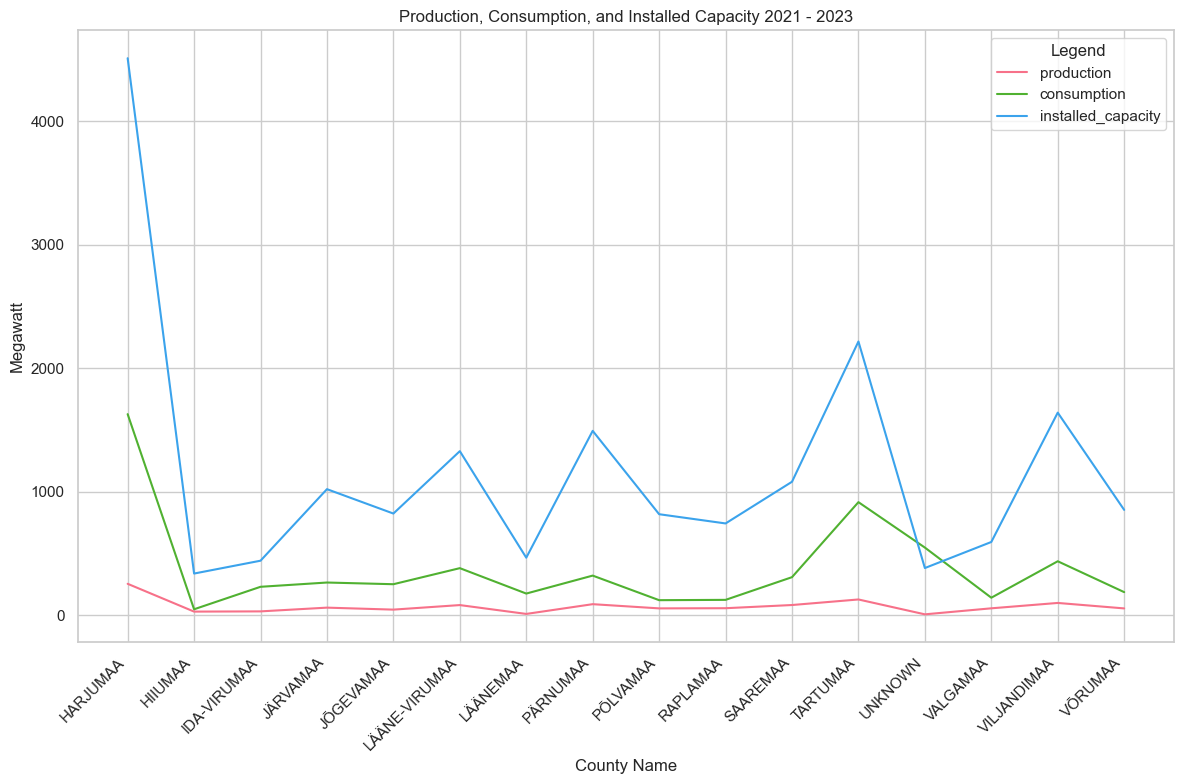

In [136]:
import seaborn as sns
import matplotlib.pyplot as plt

# Melt the DataFrame to long format
melted_df_0 = pd.melt(combined_df_0, id_vars='county_name', value_vars=['production', 'consumption', 'installed_capacity'],
                    var_name='variable', value_name='value')

# Create a line plot
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))
sns.lineplot(x='county_name', y='value', hue='variable', data=melted_df_0, palette='husl')

# Customize the plot
plt.title('Production, Consumption, and Installed Capacity 2021 - 2023')
plt.xlabel('County Name')
plt.ylabel('Megawatt')
plt.legend(title='Legend')

# Show the plot
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()

### Presenting the Data Yearly

#### Bar Plot : Consumption, Production and Installed Capacity per Year for each County

In [177]:
#Separating Data - County Name
#county_0 = merged_df3.loc[(merged_df3['county_name']=='VÕRUMAA')]
#county_0

#Separating Data - Yearly
county_year_2021 = merged_df3.loc[(merged_df3['datetime']>='2021-09-01 00:00:00')& 
    (merged_df3['datetime'] <= '2021-12-31 23:00:00')]
county_year_2021

,county,is_business,product_type,target,is_consumption,datetime,data_block_id_x,row_id,prediction_unit_id,date,eic_count,installed_capacity,data_block_id_y,county_name
0,0,0,1,0.713,0,2021-09-01 00:00:00,0,0,0,2021-09-01,108.0,952.89,2.0,HARJUMAA
1,0,0,1,96.590,1,2021-09-01 00:00:00,0,1,0,2021-09-01,108.0,952.89,2.0,HARJUMAA
2,0,0,2,0.000,0,2021-09-01 00:00:00,0,2,1,2021-09-01,17.0,166.40,2.0,HARJUMAA
3,0,0,2,17.314,1,2021-09-01 00:00:00,0,3,1,2021-09-01,17.0,166.40,2.0,HARJUMAA
4,0,0,3,2.904,0,2021-09-01 00:00:00,0,4,2,2021-09-01,688.0,7207.88,2.0,HARJUMAA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
366043,15,1,0,144.670,1,2021-12-31 23:00:00,121,366043,64,2021-12-31,8.0,260.00,123.0,VÕRUMAA
366044,15,1,1,0.000,0,2021-12-31 23:00:00,121,366044,59,2021-12-31,10.0,429.00,123.0,VÕRUMAA
366045,15,1,1,74.179,1,2021-12-31 23:00:00,121,366045,59,2021-12-31,10.0,429.00,123.0,VÕRUMAA
366046,15,1,3,0.000,0,2021-12-31 23:00:00,121,366046,60,2021-12-31,40.0,1473.70,123.0,VÕRUMAA


In [178]:
#Separating Production and Consumption
temp_table = county_year_2021.drop(columns=['target','is_consumption','row_id']).drop_duplicates()
temp_table['production'] = county_year_2021.query("is_consumption==0")['target'].values
temp_table['consumption'] = county_year_2021.query("is_consumption==1")['target'].values
target_data = temp_table

#Convert Datetime
target_data['datetime'] = target_data['datetime'].values.astype('datetime64[h]')
target_data

,county,is_business,product_type,datetime,data_block_id_x,prediction_unit_id,date,eic_count,installed_capacity,data_block_id_y,county_name,production,consumption
0,0,0,1,2021-09-01 00:00:00,0,0,2021-09-01,108.0,952.89,2.0,HARJUMAA,0.713,96.590
2,0,0,2,2021-09-01 00:00:00,0,1,2021-09-01,17.0,166.40,2.0,HARJUMAA,0.000,17.314
4,0,0,3,2021-09-01 00:00:00,0,2,2021-09-01,688.0,7207.88,2.0,HARJUMAA,2.904,656.859
6,0,1,0,2021-09-01 00:00:00,0,3,2021-09-01,5.0,400.00,2.0,HARJUMAA,0.000,59.000
8,0,1,1,2021-09-01 00:00:00,0,4,2021-09-01,43.0,1411.00,2.0,HARJUMAA,0.000,501.760
...,...,...,...,...,...,...,...,...,...,...,...,...,...
366038,15,0,1,2021-12-31 23:00:00,121,57,2021-12-31,15.0,119.20,123.0,VÕRUMAA,0.000,35.234
366040,15,0,3,2021-12-31 23:00:00,121,58,2021-12-31,67.0,996.70,123.0,VÕRUMAA,3.118,141.407
366042,15,1,0,2021-12-31 23:00:00,121,64,2021-12-31,8.0,260.00,123.0,VÕRUMAA,0.000,144.670
366044,15,1,1,2021-12-31 23:00:00,121,59,2021-12-31,10.0,429.00,123.0,VÕRUMAA,0.000,74.179


In [181]:
#Using Mean Data
mean_production_per_county_2021 = target_data.groupby('county_name')['production'].mean().reset_index()
mean_production_per_county_2021
mean_consumption_per_county_2021 = target_data.groupby('county_name')['consumption'].mean().reset_index()
mean_consumption_per_county_2021
mean_installed_capacity_per_county_2021 = target_data.groupby('county_name')['installed_capacity'].mean().reset_index()
mean_installed_capacity_per_county_2021

mean_per_county = target_data.groupby('county_name')[['production','consumption','installed_capacity']].mean().reset_index()
mean_per_county

,county_name,production,consumption,installed_capacity
0,HARJUMAA,64.753442,1445.940683,3609.485752
1,HIIUMAA,11.851131,33.179529,287.798361
2,IDA-VIRUMAA,10.480086,155.327371,386.412054
3,JÄRVAMAA,18.293851,279.776877,870.338443
4,JÕGEVAMAA,17.279308,213.569333,655.046311
5,LÄÄNE-VIRUMAA,20.099341,427.022147,1043.355902
6,LÄÄNEMAA,2.483706,126.252475,324.200000
7,PÄRNUMAA,25.272181,261.951337,1042.549481
8,PÕLVAMAA,16.409366,88.773657,537.378033
9,RAPLAMAA,16.754569,105.848464,570.344877


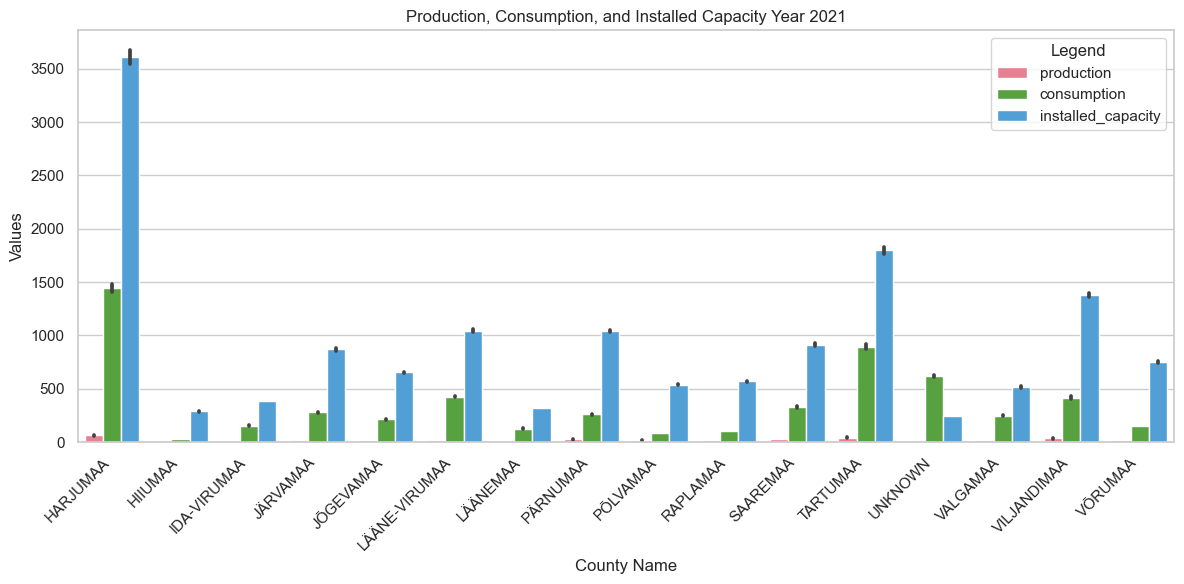

In [185]:
# Plotting Data Per Year - Seaborn Line Plot
# 2021

import seaborn as sns
import matplotlib.pyplot as plt

# Melt the DataFrame to long format
melted_df = pd.melt(target_data, id_vars='county_name', value_vars=['production', 'consumption', 'installed_capacity'],
                    var_name='variable', value_name='value')

# Set the Seaborn style
sns.set_theme(style="whitegrid")

#Create a Bar Chart
plt.figure(figsize=(12, 6))
sns.barplot(x='county_name', y='value', hue='variable', data=melted_df, palette='husl')

# Customize the plot
plt.title('Production, Consumption, and Installed Capacity Year 2021')
plt.xlabel('County Name')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Values')
plt.legend(title='Legend')

# Show the plot
plt.tight_layout()
plt.show()

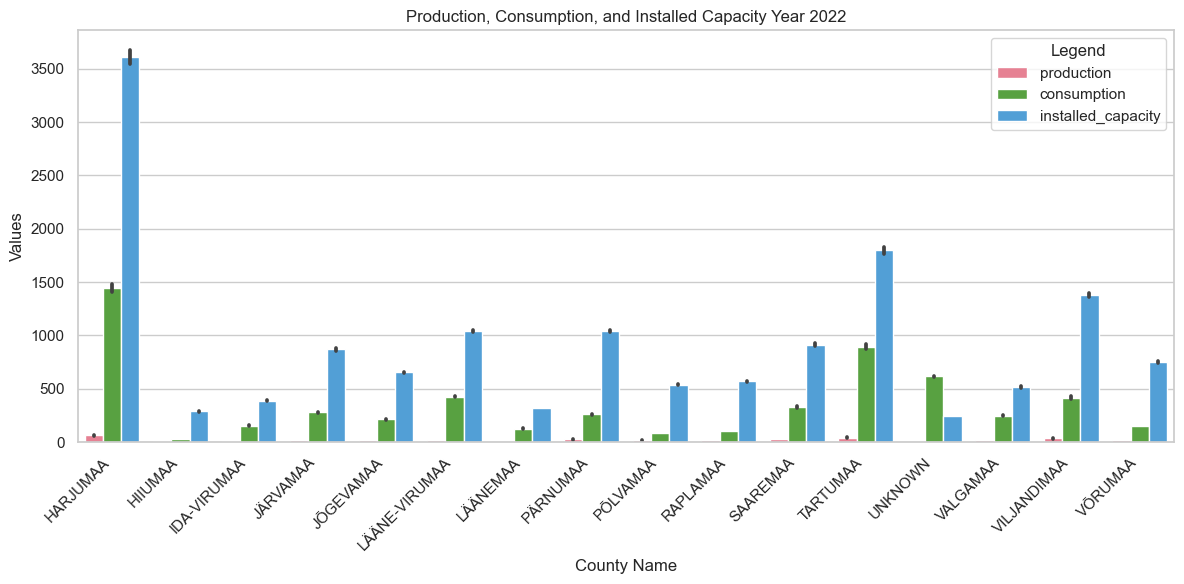

In [184]:
#Year 2022
county_year_2022 = merged_df3.loc[(merged_df3['datetime']>='2022-01-01 00:00:00')& 
    (merged_df3['datetime'] <= '2022-12-31 23:00:00')]
county_year_2022

#Separating Production and Consumption
temp_table = county_year_2022.drop(columns=['target','is_consumption','row_id']).drop_duplicates()
temp_table['production'] = county_year_2022.query("is_consumption==0")['target'].values
temp_table['consumption'] = county_year_2022.query("is_consumption==1")['target'].values
target_data22 = temp_table

#Convert Datetime
target_data22['datetime'] = target_data22['datetime'].values.astype('datetime64[h]')
target_data22

#Using Mean Data
mean_production_per_county_2022 = target_data22.groupby('county_name')['production'].mean().reset_index()
mean_production_per_county_2022
mean_consumption_per_county_2022 = target_data22.groupby('county_name')['consumption'].mean().reset_index()
mean_consumption_per_county_2022
mean_installed_capacity_per_county_2022 = target_data22.groupby('county_name')['installed_capacity'].mean().reset_index()
mean_installed_capacity_per_county_2022

mean_per_county22 = target_data22.groupby('county_name')[['production','consumption','installed_capacity']].mean().reset_index()
mean_per_county

# Plotting Data Per Year - Seaborn Line plot
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Melt the DataFrame to long format
melted_df22 = pd.melt(target_data22, id_vars='county_name', value_vars=['production', 'consumption', 'installed_capacity'],
                    var_name='variable', value_name='value')

# Set the Seaborn style
sns.set_theme(style="whitegrid")

#Create a Bar Chart
plt.figure(figsize=(12, 6))
sns.barplot(x='county_name', y='value', hue='variable', data=melted_df, palette='husl')

# Customize the plot
plt.title('Production, Consumption, and Installed Capacity Year 2022')
plt.xlabel('County Name')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Values')
plt.legend(title='Legend')

# Show the plot
plt.tight_layout()
plt.show()

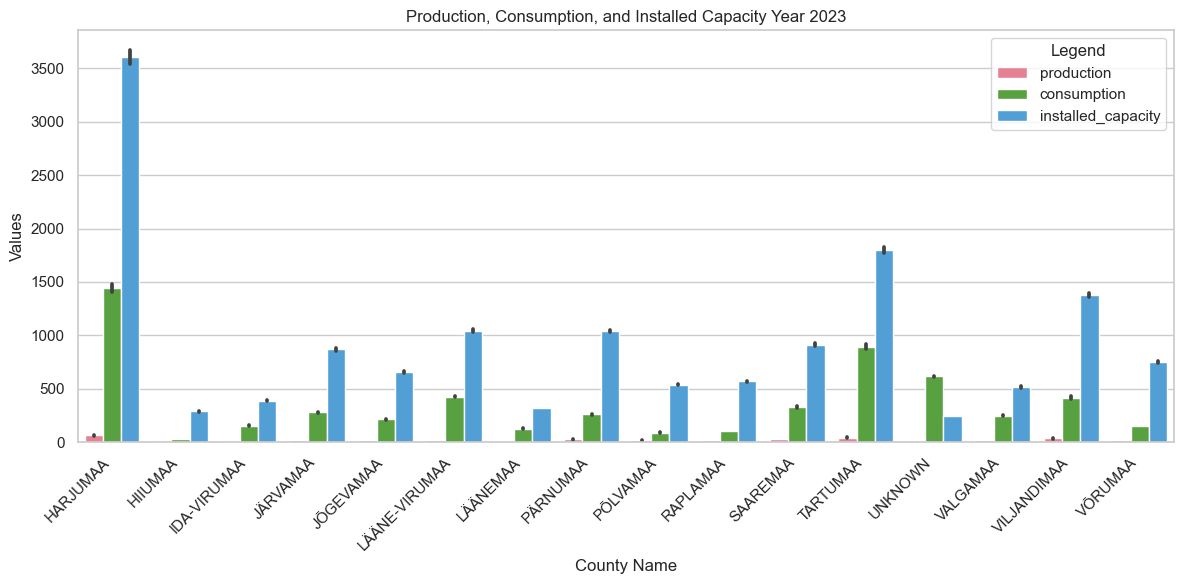

In [186]:
#Year 2023
county_year_2023 = merged_df3.loc[(merged_df3['datetime']>='2023-01-01 00:00:00')& 
    (merged_df3['datetime'] <= '2023-05-29 23:00:00')]
county_year_2023

#Separating Production and Consumption
temp_table = county_year_2023.drop(columns=['target','is_consumption','row_id']).drop_duplicates()
temp_table['production'] = county_year_2023.query("is_consumption==0")['target'].values
temp_table['consumption'] = county_year_2023.query("is_consumption==1")['target'].values
target_data23 = temp_table

#Convert Datetime
target_data23['datetime'] = target_data23['datetime'].values.astype('datetime64[h]')
target_data23

#Using Mean Data
mean_production_per_county_2023 = target_data23.groupby('county_name')['production'].mean().reset_index()
mean_production_per_county_2023
mean_consumption_per_county_2023 = target_data23.groupby('county_name')['consumption'].mean().reset_index()
mean_consumption_per_county_2023
mean_installed_capacity_per_county_2023 = target_data23.groupby('county_name')['installed_capacity'].mean().reset_index()
mean_installed_capacity_per_county_2023

mean_per_county23 = target_data23.groupby('county_name')[['production','consumption','installed_capacity']].mean().reset_index()
mean_per_county23

# Plotting Data Per Year - Seaborn Line plot
import seaborn as sns
import matplotlib.pyplot as plt

# Melt the DataFrame to long format
melted_df23 = pd.melt(mean_per_county23, id_vars='county_name', value_vars=['production', 'consumption', 'installed_capacity'],
                    var_name='variable', value_name='value')

# Set the Seaborn style
sns.set_theme(style="whitegrid")

#Create a Bar Chart
plt.figure(figsize=(12, 6))
sns.barplot(x='county_name', y='value', hue='variable', data=melted_df, palette='husl')

# Customize the plot
plt.title('Production, Consumption, and Installed Capacity Year 2023')
plt.xlabel('County Name')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Values')
plt.legend(title='Legend')

# Show the plot
plt.tight_layout()
plt.show()

#### Line Plot : Mean Consumption, Production and Installed Capacity per Year

In [193]:
# Plotting Data Per Year - Seaborn Line Plot 2021
import pandas as pd
import seaborn as sns

#Separating Data - Yearly
county_year_2021 = merged_df3.loc[(merged_df3['datetime']>='2021-09-01 00:00:00')& 
    (merged_df3['datetime'] <= '2021-12-31 23:00:00')]
county_year_2021

#Separating Production and Consumption
temp_table = county_year_2021.drop(columns=['target','is_consumption','row_id']).drop_duplicates()
temp_table['production'] = county_year_2021.query("is_consumption==0")['target'].values
temp_table['consumption'] = county_year_2021.query("is_consumption==1")['target'].values
target_data_2021 = temp_table

#Convert Datetime
target_data_2021 ['datetime'] = target_data_2021['datetime'].values.astype('datetime64[h]')
target_data_2021 

,county,is_business,product_type,datetime,data_block_id_x,prediction_unit_id,date,eic_count,installed_capacity,data_block_id_y,county_name,production,consumption
0,0,0,1,2021-09-01 00:00:00,0,0,2021-09-01,108.0,952.89,2.0,HARJUMAA,0.713,96.590
2,0,0,2,2021-09-01 00:00:00,0,1,2021-09-01,17.0,166.40,2.0,HARJUMAA,0.000,17.314
4,0,0,3,2021-09-01 00:00:00,0,2,2021-09-01,688.0,7207.88,2.0,HARJUMAA,2.904,656.859
6,0,1,0,2021-09-01 00:00:00,0,3,2021-09-01,5.0,400.00,2.0,HARJUMAA,0.000,59.000
8,0,1,1,2021-09-01 00:00:00,0,4,2021-09-01,43.0,1411.00,2.0,HARJUMAA,0.000,501.760
...,...,...,...,...,...,...,...,...,...,...,...,...,...
366038,15,0,1,2021-12-31 23:00:00,121,57,2021-12-31,15.0,119.20,123.0,VÕRUMAA,0.000,35.234
366040,15,0,3,2021-12-31 23:00:00,121,58,2021-12-31,67.0,996.70,123.0,VÕRUMAA,3.118,141.407
366042,15,1,0,2021-12-31 23:00:00,121,64,2021-12-31,8.0,260.00,123.0,VÕRUMAA,0.000,144.670
366044,15,1,1,2021-12-31 23:00:00,121,59,2021-12-31,10.0,429.00,123.0,VÕRUMAA,0.000,74.179


In [200]:
mean_production_per_2021 = target_data_2021.groupby('datetime')['production'].mean().reset_index()
mean_production_per_2021
mean_consumption_per_2021 = target_data_2021.groupby('datetime')['consumption'].mean().reset_index()
mean_consumption_per_2021
mean_installed_capacity_per_2021 = target_data_2021.groupby('datetime')['installed_capacity'].mean().reset_index()
mean_installed_capacity_per_2021

mean_per_county_2021 = target_data_2021.groupby('county_name')[['production','consumption','installed_capacity']].mean().reset_index()
mean_per_county_2021

,county_name,production,consumption,installed_capacity
0,HARJUMAA,64.753442,1445.940683,3609.485752
1,HIIUMAA,11.851131,33.179529,287.798361
2,IDA-VIRUMAA,10.480086,155.327371,386.412054
3,JÄRVAMAA,18.293851,279.776877,870.338443
4,JÕGEVAMAA,17.279308,213.569333,655.046311
5,LÄÄNE-VIRUMAA,20.099341,427.022147,1043.355902
6,LÄÄNEMAA,2.483706,126.252475,324.200000
7,PÄRNUMAA,25.272181,261.951337,1042.549481
8,PÕLVAMAA,16.409366,88.773657,537.378033
9,RAPLAMAA,16.754569,105.848464,570.344877


In [196]:
melted_df_2021 = pd.melt(mean_per_county_2021, id_vars='datetime', value_vars=['production', 'consumption','installed_capacity'],
                    var_name='variable', value_name='value')

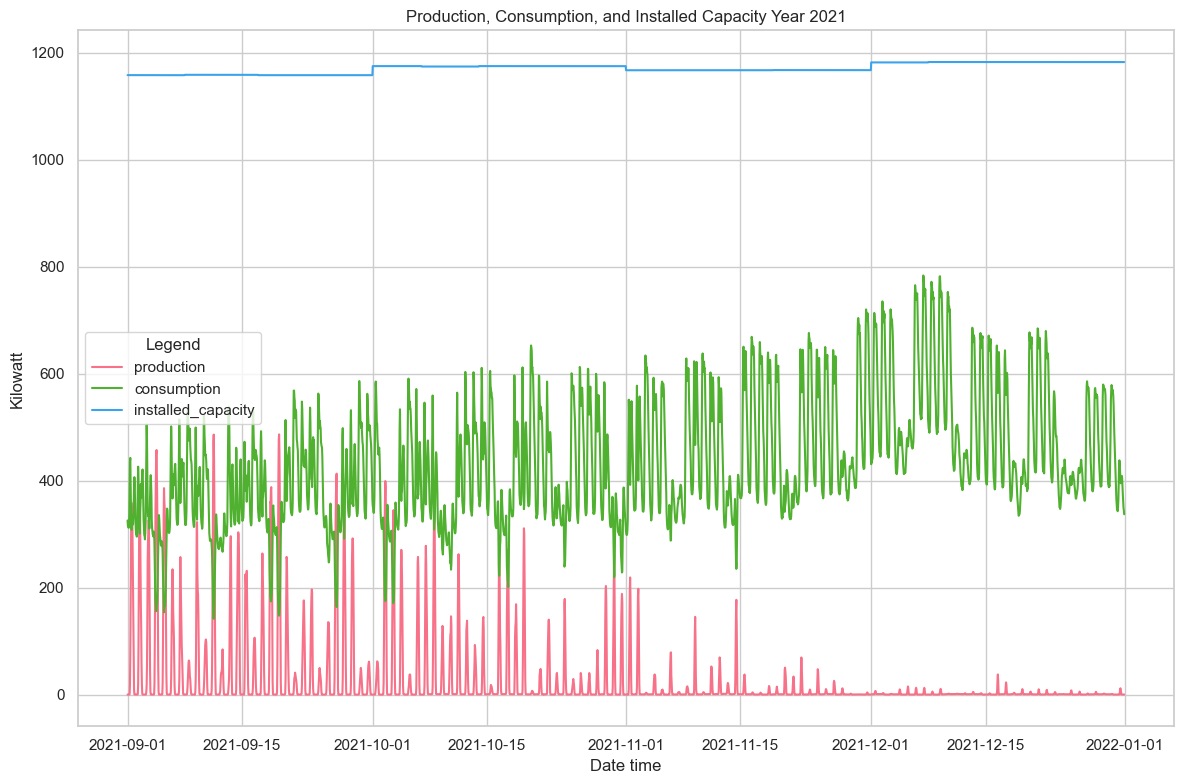

In [201]:
# Create a line plot
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))
sns.lineplot(x='datetime', y='value', hue='variable', data=melted_df, palette='husl',errorbar = None)

# Customize the plot
plt.title('Production, Consumption, and Installed Capacity Year 2021')
plt.xlabel('Date time')
plt.ylabel('Kilowatt')
plt.legend(title='Legend')

# Show the plot
#plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()

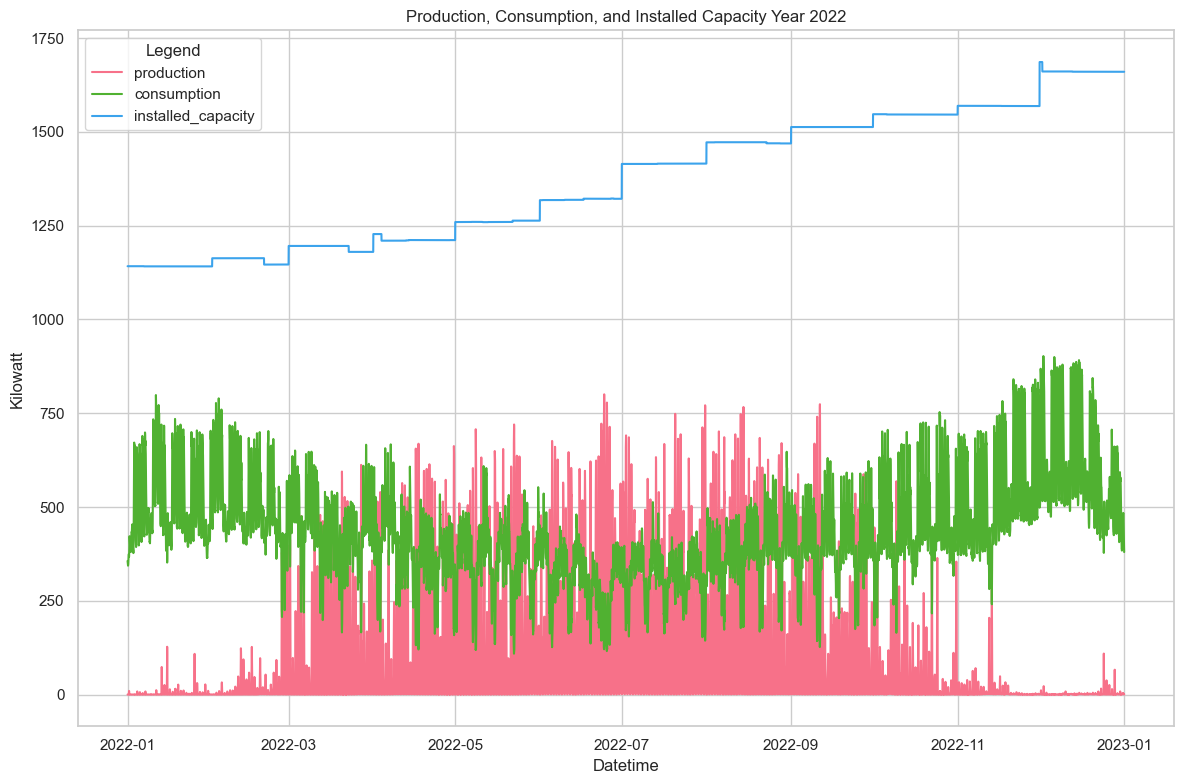

In [202]:
# Plotting Data Per Year - Seaborn Line Plot 2022
county_year_2022 = merged_df3.loc[(merged_df3['datetime']>='2022-01-01 00:00:00')& 
    (merged_df3['datetime'] <= '2022-12-31 23:00:00')]
county_year_2022

#Separating Production and Consumption
temp_table = county_year_2022.drop(columns=['target','is_consumption','row_id']).drop_duplicates()
temp_table['production'] = county_year_2022.query("is_consumption==0")['target'].values
temp_table['consumption'] = county_year_2022.query("is_consumption==1")['target'].values
target_data_2022 = temp_table

#Convert Datetime
target_data_2022['datetime'] = target_data_2022['datetime'].values.astype('datetime64[h]')
target_data_2022

#Using Mean Data
mean_production_per_2022 = target_data_2022.groupby('datetime')['production'].mean().reset_index()
mean_production_per_2022
mean_consumption_per_2022 = target_data_2022.groupby('datetime')['consumption'].mean().reset_index()
mean_consumption_per_2022
mean_installed_capacity_per_2022 = target_data_2022.groupby('datetime')['installed_capacity'].mean().reset_index()
mean_installed_capacity_per_2022

mean_per_2022 = target_data_2022.groupby('datetime')[['production','consumption','installed_capacity']].mean().reset_index()
mean_per_2022

# Plotting Data Per Year - Seaborn Line plot
import seaborn as sns
import matplotlib.pyplot as plt

# Melt the DataFrame to long format
melted_df22 = pd.melt(mean_per_2022, id_vars='datetime', value_vars=['production', 'consumption', 'installed_capacity'],
                    var_name='variable', value_name='value')

# Set the Seaborn style
sns.set_theme(style="whitegrid")

#Create a Line Chart
plt.figure(figsize=(12, 8))
#sns.lineplot(x='date', y='value', hue='variable', data=melted_df22, palette='husl', errorbar = None)
sns.lineplot(x='datetime', y='value', hue='variable', data=melted_df22, palette='husl')

# Customize the plot
plt.title('Production, Consumption, and Installed Capacity Year 2022')
plt.xlabel('Datetime')
#plt.xticks(rotation=45, ha='right')
plt.ylabel('Kilowatt')
plt.legend(title='Legend')

# Show the plot
#plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()

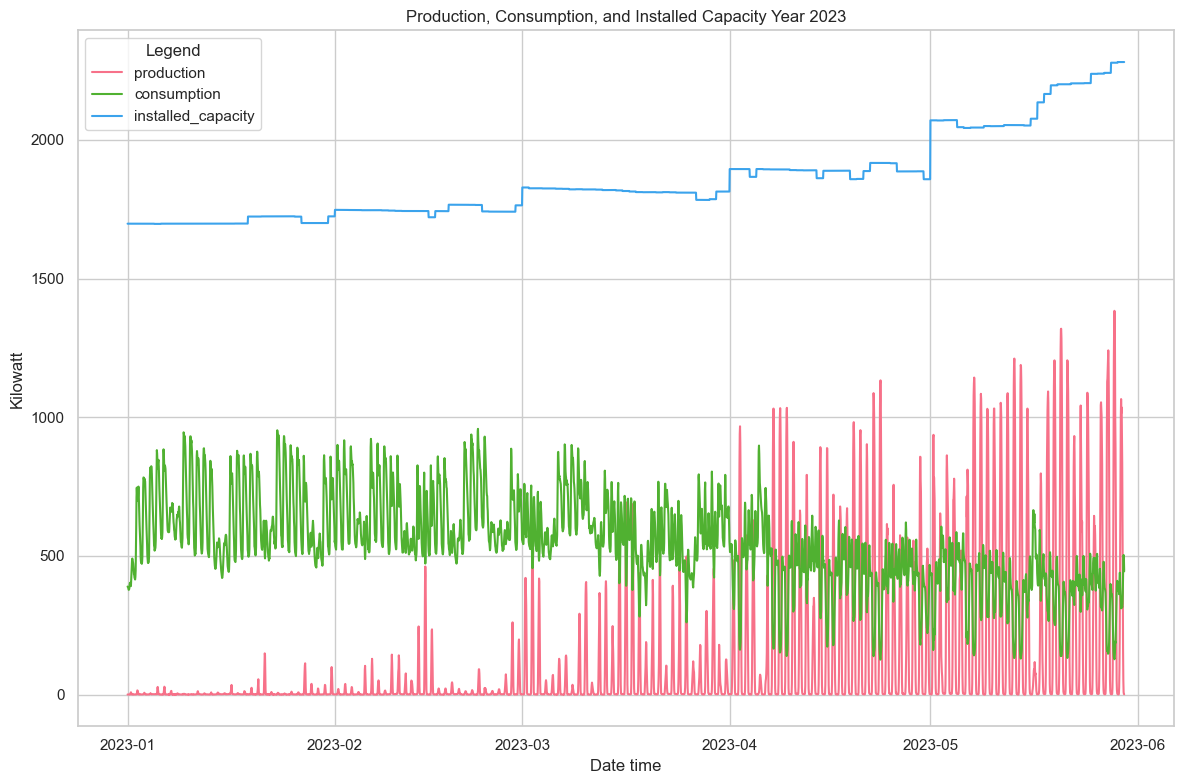

In [199]:
# Plotting Data Per Year - Seaborn Line Plot 2023
county_year_2023 = merged_df3.loc[(merged_df3['datetime']>='2023-01-01 00:00:00')& 
    (merged_df3['datetime'] <= '2023-05-29 23:00:00')]
county_year_2023

#Separating Production and Consumption
temp_table = county_year_2023.drop(columns=['target','is_consumption','row_id']).drop_duplicates()
temp_table['production'] = county_year_2023.query("is_consumption==0")['target'].values
temp_table['consumption'] = county_year_2023.query("is_consumption==1")['target'].values
target_data_2023 = temp_table

#Convert Datetime
target_data_2023['datetime'] = target_data_2023['datetime'].values.astype('datetime64[h]')
target_data_2023

#Using Mean Data
mean_production_per_2023 = target_data_2023.groupby('datetime')['production'].mean().reset_index()
mean_production_per_2023
mean_consumption_per_2023 = target_data_2023.groupby('datetime')['consumption'].mean().reset_index()
mean_consumption_per_2023
mean_installed_capacity_per_2023 = target_data_2023.groupby('datetime')['installed_capacity'].mean().reset_index()
mean_installed_capacity_per_2023

mean_per_2023 = target_data_2023.groupby('datetime')[['production','consumption','installed_capacity']].mean().reset_index()
mean_per_2023

# Plotting Data Per Year - Seaborn Line plot
import seaborn as sns
import matplotlib.pyplot as plt

# Melt the DataFrame to long format
melted_df23 = pd.melt(mean_per_2023, id_vars='datetime', value_vars=['production', 'consumption', 'installed_capacity'],
                    var_name='variable', value_name='value')

# Set the Seaborn style
sns.set_theme(style="whitegrid")

#Create a Line Graph
plt.figure(figsize=(12, 8))
sns.lineplot(x='datetime', y='value', hue='variable', data=melted_df23, palette='husl')

# Customize the plot
plt.title('Production, Consumption, and Installed Capacity Year 2023')
plt.xlabel('Date time')
#plt.xticks(rotation=45, ha='right')
plt.ylabel('Kilowatt')
plt.legend(title='Legend')

# Show the plot
plt.tight_layout()
plt.show()